# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"
 
# Define an empty list to fetch the weather data for each city
city_data = []
 
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
 
# Create counters
record_count = 1
set_count = 1
 
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
 
    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}&units=metric"
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
 
    # Add 1 to the record count
    record_count += 1
 
    # Run an API request for each of the cities
    try:
        # Make the API request and get the response
        response = requests.get(city_url)
 
        # Parse the JSON response
        city_weather = response.json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
 
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
 
    except:
        print("City not found. Skipping...")
        pass
 
    # Add a time delay to avoid hitting API rate limits
    time.sleep(1)
 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | rensselaer
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | aksu
Processing Record 6 of Set 1 | afaahiti
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | tralee
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | hacienda huancane
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | imranli
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | brandon
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | basco
Processing Record 22 of Set 1 | vernon
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.75,75,24,3.13,EC,1731877429
1,rensselaer,42.7168,-73.4829,9.69,53,99,1.17,US,1731877430
2,waitangi,-43.9535,-176.5597,12.68,68,8,2.24,NZ,1731877431
3,iqaluit,63.7506,-68.5145,-3.15,63,75,6.17,CA,1731877433
4,aksu,41.1231,80.2644,6.58,44,98,1.47,CN,1731877434


In [6]:
# Export the City_Data into a csv
##city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

import os

if not os.path.exists("output_data"):
    os.makedirs("output_data")
    
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,75,24,3.13,EC,1731877429
1,rensselaer,42.7168,-73.4829,9.69,53,99,1.17,US,1731877430
2,waitangi,-43.9535,-176.5597,12.68,68,8,2.24,NZ,1731877431
3,iqaluit,63.7506,-68.5145,-3.15,63,75,6.17,CA,1731877433
4,aksu,41.1231,80.2644,6.58,44,98,1.47,CN,1731877434


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

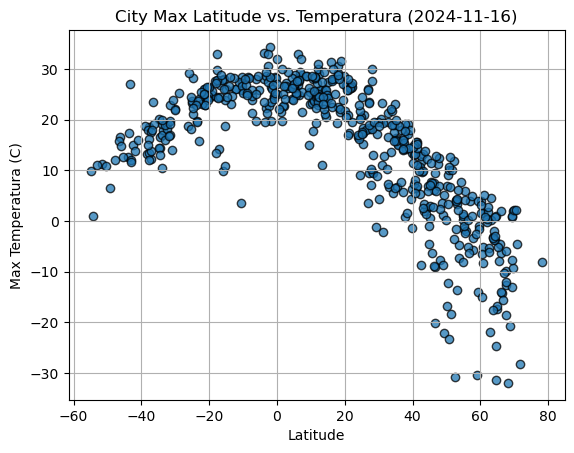

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperatura (2024-11-16)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatura (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

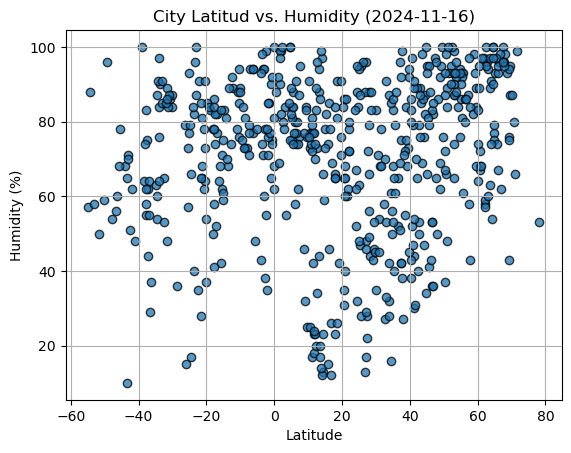

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitud vs. Humidity (2024-11-16)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

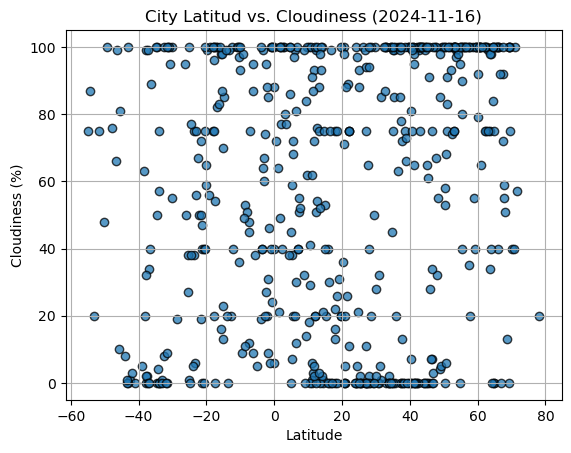

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitud vs. Cloudiness (2024-11-16)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

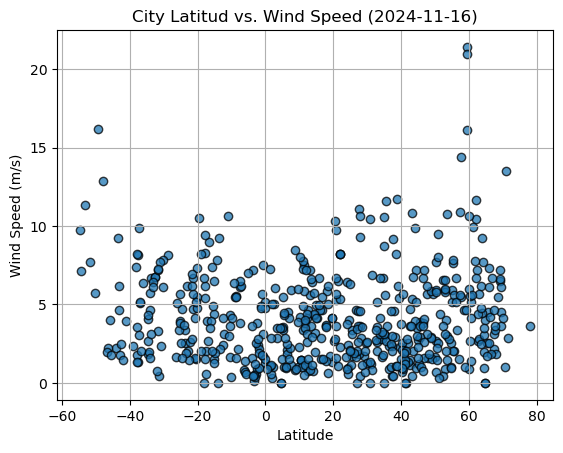

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitud vs. Wind Speed (2024-11-16)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress_plot (x_values, y_values, y_axis):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values, edgecolors="black", alpha=0.75)
    
    # Set x coordinates for model's formula 
    if x_values.sum() > 0:
        x_coord = 5
    else:
        x_coord = -50
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_coord,10),fontsize=18,color="red")
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    plt.title(f"{x_values.name} vs. {y_values.name} Scatter Plot with Linear Regression")
    
    # Print r square value
    print(f"The r^2 is: {rvalue}")

    # Show plot
    return plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rensselaer,42.7168,-73.4829,9.69,53,99,1.17,US,1731877430
3,iqaluit,63.7506,-68.5145,-3.15,63,75,6.17,CA,1731877433
4,aksu,41.1231,80.2644,6.58,44,98,1.47,CN,1731877434
8,tralee,52.2704,-9.7026,11.91,95,100,6.55,IE,1731877438
9,qaqortoq,60.7167,-46.0333,-5.20,67,100,4.17,GL,1731877440


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,75,24,3.13,EC,1731877429
2,waitangi,-43.9535,-176.5597,12.68,68,8,2.24,NZ,1731877431
5,afaahiti,-17.7500,-149.2833,24.42,86,100,8.28,PF,1731877435
6,grytviken,-54.2811,-36.5092,0.97,88,87,7.13,GS,1731877436
7,uturoa,-16.7333,-151.4333,26.76,77,100,8.96,PF,1731877437


###  Temperature vs. Latitude Linear Regression Plot

The r^2 is: -0.8605809687796705


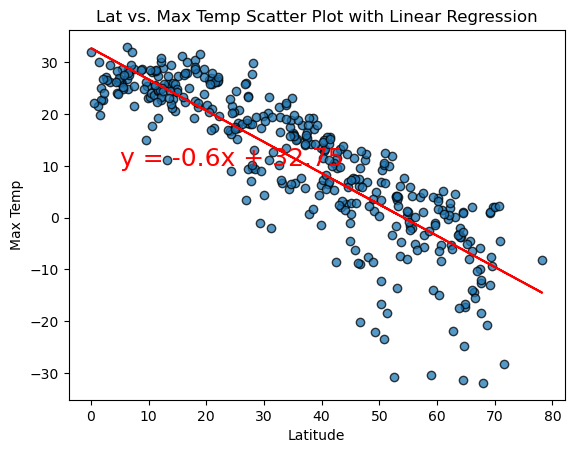

In [15]:
# Linear regression on Northern Hemisphere
lin_regress_plot(north_hemi_df["Lat"], north_hemi_df["Max Temp"], "Max Temp")



The r^2 is: 0.7127609731384322


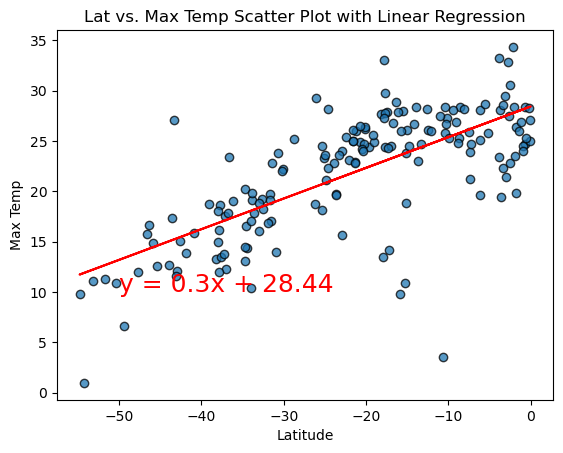

In [16]:
# Linear regression on Southern Hemisphere
lin_regress_plot(south_hemi_df["Lat"], south_hemi_df["Max Temp"], "Max Temp")



**Discussion about the linear relationship:**

The scatter plots with linear regression of temperature vs Latitude indicate in the northern hemisphere the temperature decreases as the latitude increases, this is consistent with the current season as it is expected that higher latitudes experience colder temperatures, especially in the winter.

The souther hemisphere current season is spring so temperatures are higher than those of northern hemisphere (there is no negative scale in the y-axis) but we still see the correlation between greater latitudes and higher temperatures.

Also, the R value, which indicates how good the linear regression explains the data, is lower for the souther hemisphere because there is less data points than the northern one, but that does not mean that it does not follow the same trend. The value is negative because it is a negative correlation, for the northern regression is almost a strong correlation while the sourther one is weak.

### Humidity vs. Latitude Linear Regression Plot

The r^2 is: 0.2469291223886914


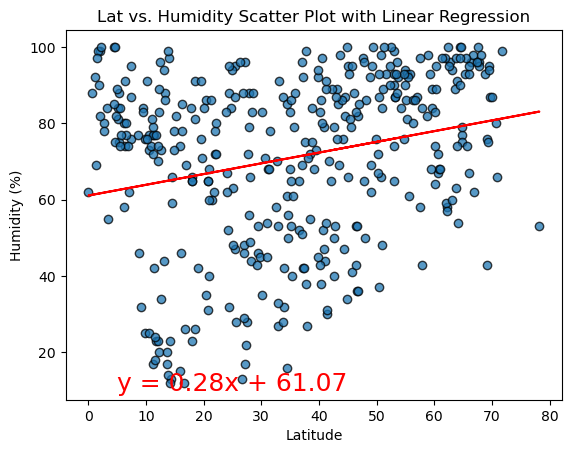

In [17]:
# Northern Hemisphere
lin_regress_plot (north_hemi_df["Lat"], north_hemi_df["Humidity"], "Humidity (%)")

The r^2 is: 0.2436118858291613


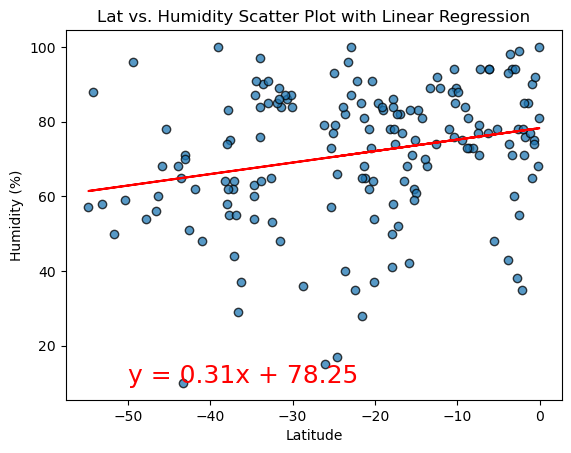

In [18]:
# Southern Hemisphere
lin_regress_plot (south_hemi_df["Lat"], south_hemi_df["Humidity"], "Humidity (%)")

**Discussion about the linear relationship:**

Regressions between latitude and humidity is very weak for both northern and souther hemispheres but still both are positive corralations that indicate that increasing the latitude, the city will be more humid but is definetly dependent on the latitude.


### Cloudiness vs. Latitude Linear Regression Plot

The r^2 is: 0.25273960817355684


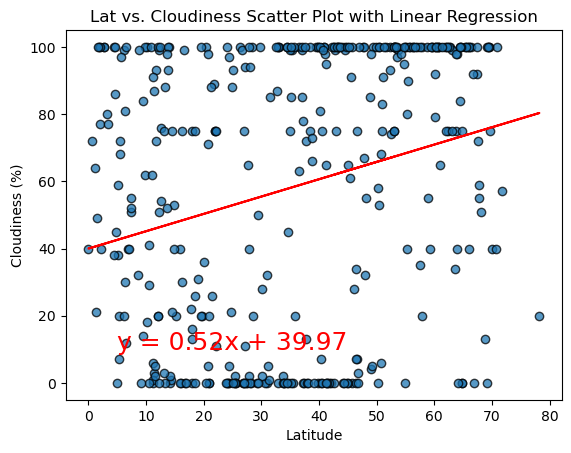

In [19]:
# Northern Hemisphere
lin_regress_plot (north_hemi_df["Lat"], north_hemi_df["Cloudiness"], "Cloudiness (%)")

The r^2 is: 0.16628122406258575


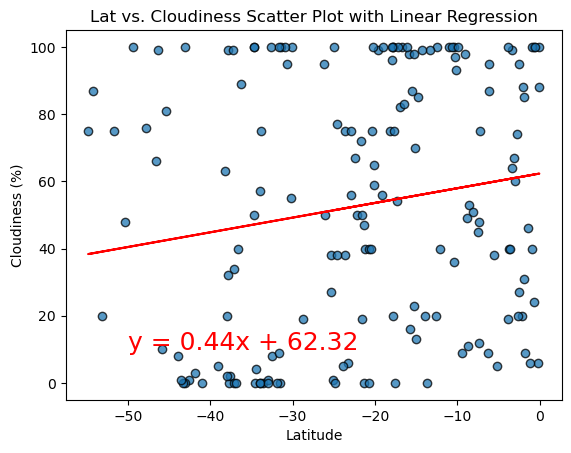

In [20]:
# Southern Hemisphere
lin_regress_plot (south_hemi_df["Lat"], south_hemi_df["Cloudiness"], "Cloudiness (%)")

**Discussion about the linear relationship:** 

Like humidity, cloudiness has a weak positive correlation against latitude for both norther and souther hemispheres. This indicates that latitude on its own does not explain the % of cloudiness in the city.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 is: 0.18394635093569142


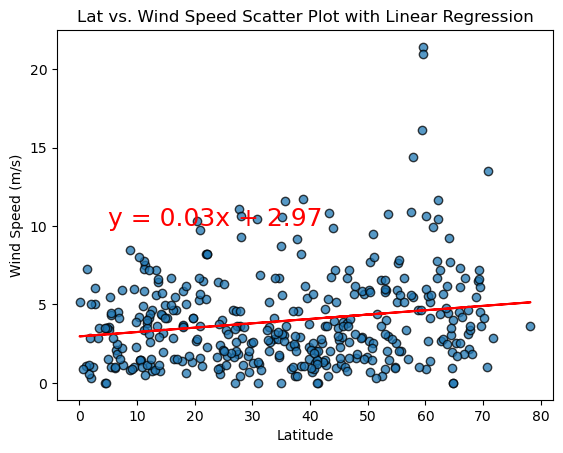

In [21]:
# Northern Hemisphere
lin_regress_plot(north_hemi_df["Lat"], north_hemi_df["Wind Speed"], "Wind Speed (m/s)")

The r^2 is: -0.3080762804577132


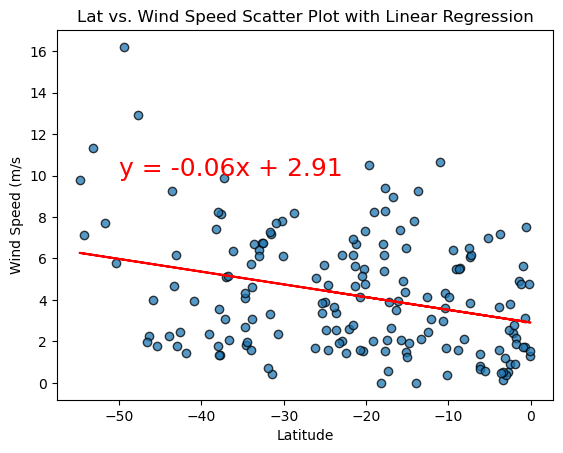

In [22]:
# Southern Hemisphere
lin_regress_plot(south_hemi_df["Lat"], south_hemi_df["Wind Speed"], "Wind Speed (m/s")

**Discussion about the linear relationship:** 

Wind speed correlation is also a weak one considering latitude. Correlations are opposite, being the northern hemisphere a positive one and the souther hemisphere a negative one.